# 02 – Order Items Exploratory Analysis

Goal:
- Combine cleaned 2025 order-level data
- Explore revenue, order behavior, and trends
- Identify patterns to guide segmentation and campaigns


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
q1 = pd.read_csv("../data/cleaned/orders_2025_q1.csv")
q2 = pd.read_csv("../data/cleaned/orders_2025_q2.csv")
q3 = pd.read_csv("../data/cleaned/orders_2025_q3.csv")
q4 = pd.read_csv("../data/cleaned/orders_2025_q4.csv")


In [41]:
for df in [q1, q2, q3, q4]:
    df["Order Date"] = pd.to_datetime(df["Order Date"], utc=True)
    df["Order Date"] = df["Order Date"].dt.tz_convert("America/Los_Angeles")

###### Timestamps were converted to Pacific Time (America/Los_Angeles) for interpretability in downstream analysis.


In [45]:
q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13779 entries, 0 to 13778
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype                              
---  ------          --------------  -----                              
 0   Order Date      13779 non-null  datetime64[ns, America/Los_Angeles]
 1   Order ID        13779 non-null  object                             
 2   Order Type      13778 non-null  object                             
 3   Tax Amount      13779 non-null  float64                            
 4   Tip             13779 non-null  float64                            
 5   Discount        13779 non-null  float64                            
 6   Order Total     13779 non-null  float64                            
 7   Payments Total  13779 non-null  float64                            
 8   Tender          13512 non-null  object                             
dtypes: datetime64[ns, America/Los_Angeles](1), float64(5), object(3)
memory usage: 969.0

In [47]:
orders_2025 = pd.concat([q1, q2, q3, q4],ignore_index=True)

In [51]:
orders_2025.shape

(50487, 9)

In [52]:
orders_2025["Order ID"].nunique(),
orders_2025["Order Date"].dtype

datetime64[ns, America/Los_Angeles]

###### All cleaned quarterly datasets were concatenated into a single 2025 order-level table.


In [53]:
orders_2025 = orders_2025.sort_values("Order Date")

In [54]:
orders_2025.head()

,Order Date,Order ID,Order Type,Tax Amount,Tip,Discount,Order Total,Payments Total,Tender
12119,2025-01-01 11:03:00-08:00,98NY3SQP6V8RW,Pick Up,1.75,0.0,0.0,21.80,21.80,Debit Card
12118,2025-01-01 11:17:00-08:00,EY0TQW2Y4A9EJ,Pick Up,1.55,0.0,0.0,19.26,19.26,Cash
12117,2025-01-01 11:46:00-08:00,9SFS2SMTBWSBR,Pick Up,2.32,3.0,0.0,28.85,28.85,Credit Card
12116,2025-01-01 11:50:00-08:00,3B64ZTEKFTFAT,Delivery,0.00,0.0,0.0,41.18,0.00,NaN
12115,2025-01-01 11:51:00-08:00,ZZE8THFN9111C,Pick Up,0.37,0.0,0.0,4.55,4.55,Cash


In [56]:
orders_2025["order_month"] = orders_2025["Order Date"].dt.to_period("M")
orders_2025["order_day"] = orders_2025["Order Date"].dt.day_name()
orders_2025["order_hour"] = orders_2025["Order Date"].dt.hour

/var/folders/qv/xk2cf5916ygbcqf0lm73ntjc0000gn/T/ipykernel_11579/3746111799.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  orders_2025["order_month"] = orders_2025["Order Date"].dt.to_period("M")


### EDA 1 — Monthly Revenue

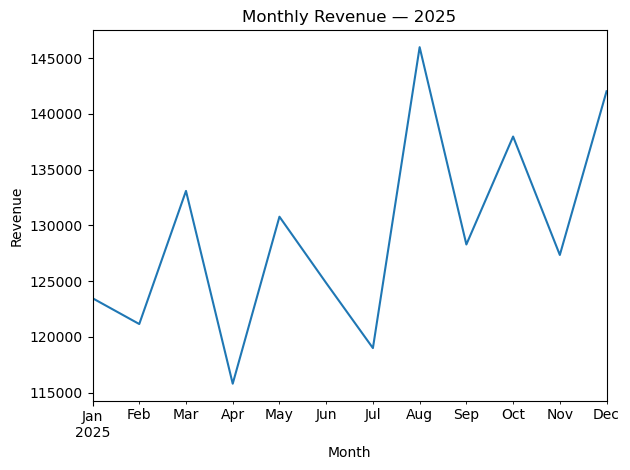

In [59]:
monthly_revenue = (
    orders_2025
    .groupby("order_month")["Order Total"]
    .sum()
)

monthly_revenue.plot(kind="line")
plt.title("Monthly Revenue — 2025")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


### Monthly Revenue Trends

Monthly revenue in 2025 shows noticeable variability rather than a smooth upward or downward trend.

- Revenue fluctuates throughout the year, with visible peaks and dips month to month.
- The lowest revenue appears in early spring (around April), followed by a recovery in late spring.
- A strong peak occurs in late summer (around August), representing the highest monthly revenue of the year.
- Revenue remains relatively elevated in the second half of the year compared to the first half, despite some volatility.
- The year ends on a higher note, with December revenue exceeding most earlier months.

Overall, revenue growth in 2025 appears to be driven by intermittent high-performing months rather than steady month-over-month increases.

### EDA 2 — Monthly Order Volume

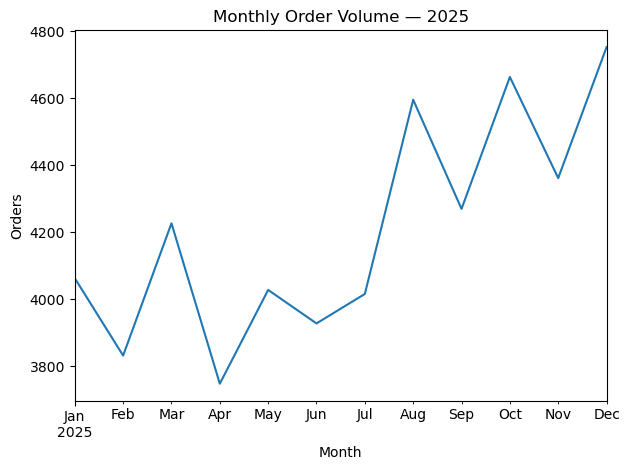

In [60]:
monthly_orders = (
    orders_2025
    .groupby("order_month")["Order ID"]
    .count()
)

monthly_orders.plot(kind="line")
plt.title("Monthly Order Volume — 2025")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()


In [80]:
orders_2025["order_month"].value_counts().sort_index()

2025-01    4063
2025-02    3832
2025-03    4227
2025-04    3748
2025-05    4028
2025-06    3928
2025-07    4016
2025-08    4596
2025-09    4270
2025-10    4664
2025-11    4362
2025-12    4753
Freq: M, Name: order_month, dtype: int64

### Monthly Order Volume Trends

Monthly order volume increases in the second half of 2025, with peaks in late summer and the final quarter. This pattern closely mirrors monthly revenue trends, indicating that higher revenue months are largely driven by increased order counts.

Numeric monthly order counts were reviewed alongside the visualization to confirm observed trends.

### EDA 3 — Average Order Value

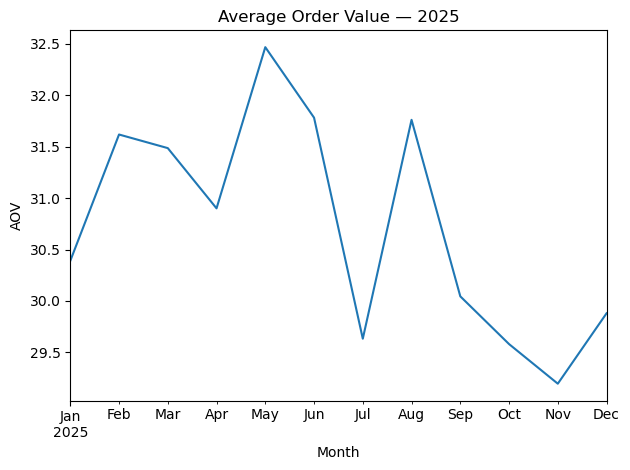

In [61]:
monthly_aov = monthly_revenue / monthly_orders

monthly_aov.plot(kind="line")
plt.title("Average Order Value — 2025")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.tight_layout()
plt.show()

### Average Order Value Trends

Average order value (AOV) in 2025 remains relatively stable compared to revenue and order volume, with moderate month-to-month variation.

- AOV fluctuates within a narrow range across the year, generally staying around the low $30 range.
- The highest AOV occurs in late spring (around May), followed by a gradual decline into mid-summer.
- A noticeable dip appears in mid-summer (around July), after which AOV briefly rebounds before declining again in early fall.
- The lowest AOV values occur in the late fall months, with a modest recovery toward the end of the year.

Overall, AOV does not exhibit a sustained upward trend, suggesting that changes in total revenue are more strongly influenced by order volume rather than increases in per-order spend.


### EDA 4 — Order Type Distribution

In [62]:
orders_2025["Order Type"].value_counts(normalize=True)


Pick Up             0.668165
Delivery            0.223805
In-store Pickup     0.057937
Popmenu Pickup      0.034524
Popmenu Delivery    0.015569
Name: Order Type, dtype: float64

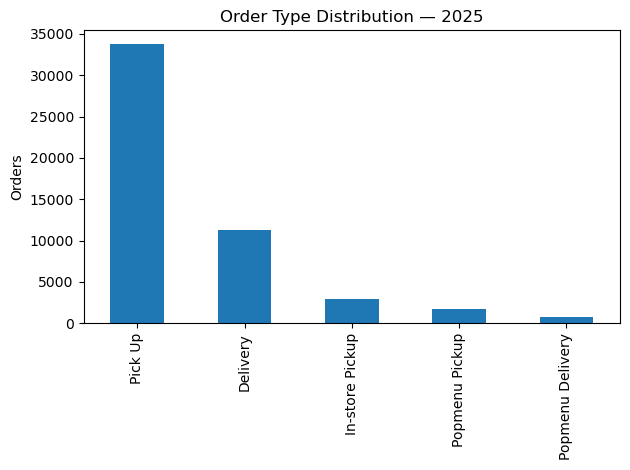

In [63]:
orders_2025["Order Type"].value_counts().plot(kind="bar")
plt.title("Order Type Distribution — 2025")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()


### Order Type Distribution

Order volume in 2025 is heavily concentrated in pickup orders, which account for the majority of transactions.

- Pickup is the dominant order type by a wide margin, indicating strong customer preference for convenience and speed.
- Delivery represents the second-largest channel, while in-store and popmenu-based orders contribute a much smaller share of total volume.
- The long tail of less frequent order types suggests opportunities for targeted marketing rather than broad campaigns.

Overall, the distribution indicates that marketing efforts are likely to be most effective when focused on pickup and delivery customers, with secondary channels better suited for niche or experimental promotions.


### EDA 5 — Discount Usage

In [64]:
(orders_2025["Discount"] > 0).mean()

0.0

In [65]:
orders_2025.groupby(orders_2025["Discount"] > 0)["Order Total"].mean()

Discount
False    30.696161
Name: Order Total, dtype: float64

### Discount Usage

No discounted orders are present in the 2025 data, indicating that all observed revenue and order behavior reflects full-price transactions. Discount-based comparisons are therefore not applicable in this analysis.


### EDA 6 — Busiest Hours

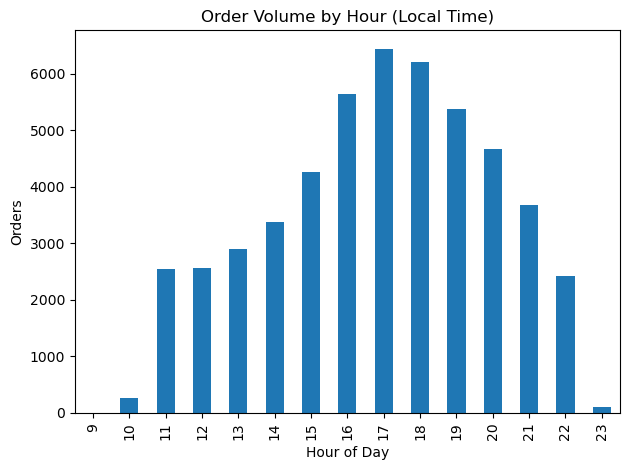

In [70]:
hourly_orders = (
    orders_2025
    .groupby("order_hour")["Order ID"]
    .count()
)

hourly_orders.plot(kind="bar")
plt.title("Order Volume by Hour (Local Time)")
plt.xlabel("Hour of Day")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()

In [67]:
orders_2025.groupby("order_hour")["Order Total"].sum()

order_hour
9        230.70
10      9096.28
11     81458.65
12     75087.09
13     83413.97
14    105797.97
15    135359.93
16    184049.81
17    211024.47
18    202650.63
19    168243.49
20    136369.12
21    101538.71
22     54845.96
23       590.31
Name: Order Total, dtype: float64

### Busiest Hours of the Day

Order volume in 2025 follows a clear intraday pattern, with activity building steadily through the afternoon and peaking during the dinner window.

- Order volume begins increasing in late morning and accelerates through the afternoon.
- Peak order activity occurs between approximately 16:00 and 18:00, representing the busiest hours of the day.
- Order volume remains elevated through the early evening before tapering off later at night.
- Morning and late-night hours contribute minimal order volume relative to peak periods.

This distribution highlights the importance of afternoon and evening time windows for operational planning and time-sensitive marketing efforts.


### EDA 7 — Day of Week Patterns

In [73]:
day_order = [
    "Sunday", "Monday", "Tuesday",
    "Wednesday", "Thursday", "Friday", "Saturday"
]


In [74]:
orders_by_day = orders_2025.groupby("order_day")["Order ID"].count()

In [75]:
orders_by_day = orders_by_day.reindex(day_order)

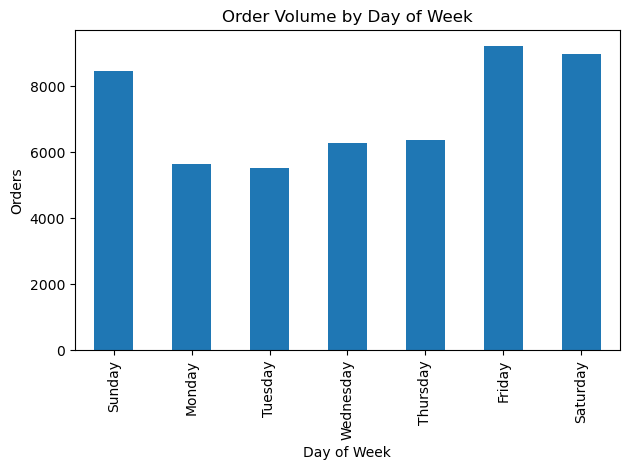

In [76]:
orders_by_day.plot(kind="bar")
plt.title("Order Volume by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()

In [78]:
orders_2025["order_day"].value_counts()

Friday       9234
Saturday     8986
Sunday       8457
Thursday     6362
Wednesday    6287
Monday       5643
Tuesday      5518
Name: order_day, dtype: int64

### Day of Week Order Patterns

Order volume peaks on Fridays and Saturdays, with Sundays also showing elevated activity, while early weekdays experience lower demand. This highlights weekends as the primary opportunity for marketing focus and operational emphasis.


### Data Notes

This analysis is based on order-level data and does not include item-level detail or customer identifiers. Insights reflect aggregate order behavior rather than individual customer patterns.


## Phase 3 Summary — Exploratory Analysis

This exploratory analysis examined 2025 order-level data to understand revenue trends, ordering behavior, and temporal patterns.

Key findings include:

- Revenue growth throughout the year is driven primarily by increases in order volume rather than sustained increases in average order value.
- Average order value remains relatively stable across months, indicating consistent per-order spend.
- Pickup orders dominate overall volume, with delivery serving as a strong secondary channel, while other order types contribute minimally.
- No discounted orders are present in the dataset, suggesting observed behavior reflects full-price purchasing.
- Order activity is highly time-dependent, with peak demand occurring in the late afternoon and early evening hours.
- Order volume is strongest toward the end of the week, with Fridays and Saturdays representing the highest-demand days.

These patterns provide a foundation for deeper segmentation and targeting analysis, including customer behavior, order frequency, and channel-specific strategies explored in the next phase.

Phase 4 begins in the next notebook, where the focus shifts from exploration to
order - and customer-level segmentation.
